<a href="INSERT_colab_R_link" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

label: exercise_3
# Exercise 3: Smoothed Cross-Entropy Loss (b)
Implement the smoothed cross-entropy. We provide the signature of the function here as a reference:

In [2]:
#| label: exercise_3_signature
#’ @param label ground truth vector of the form (n_samples,).
#’ Labels should be "1","2","3" and so on.
#’ @param pred Predicted probabilities of the form (n_samples,n_labels)
#’ @param smoothing Hyperparameter for label-smoothing
smoothed_ce_loss <- function(
label,
pred,
smoothing){
return (loss)
}


label: solution
# Solution

In [3]:
#' @param label ground truth vector of the form (n_samples,).
#'  Labels should be "1","2","3" and so on.
#' @param pred Predicted probabilities of the form (n_samples,n_labels)
#' @param smoothing Hyperparameter for label-smoothing

smoothed_ce_loss <- function(
	label,
	pred,
	smoothing){

	num_samples <- NROW(pred)
	num_classes<- NCOL(pred)

	# Let's make some assertions:
	#  label should be a 1-D array.one-hot encoded label is not necessary 
	stopifnot(NCOL(label)==1)  
	# smoothing hyperparameter in allowed range
	stopifnot((smoothing>=0 & smoothing <= 1)) 
	# Same amount of rows in labels and predictions
	stopifnot((NROW(label)== num_samples))
	# Predicted probabilities must have as many columns as labels  
	stopifnot(length(unique(label)) == num_classes)
		
	#Calculate the base level
	smoothing_per_class <- smoothing / num_classes

	# build the label matrix. Shape = [ num_samples, num_classes]
	# Start with the base level
	smoothed_labels_matrix = matrix(smoothing_per_class,
									nrow=num_samples,ncol=num_classes) 
	# Add the smoothed correct labels
	true_labels_loc=cbind(1:num_samples, label)
	smoothed_labels_matrix[true_labels_loc]= 1 - smoothing + smoothing_per_class
	cat("Labels matrix:\n")
	print(smoothed_labels_matrix)

	# Calculate the loss
	cat("Loss for each sample:\n ",
		rowSums(- smoothed_labels_matrix * log(pred)))

	loss <- mean(rowSums(- smoothed_labels_matrix * log(pred)))
	cat("\n Loss:\n",loss)

	return (loss)
}


In [4]:
# Let's build a "confident model", the model has very high predicted
#probabilities for one of the labels
label= c(1,2,2,3,1)
pred= rbind(
		c(0.85,0.10,0.05),
		c(0.05,0.9,0.05),
		c(0.02,0.95,0.03),
		c(0.13,0.02,0.85),
		c(0.86,0.04,0.1))

# cross entropy means smoothing=0
smoothing=0
loss<-smoothed_ce_loss(label,pred,smoothing)

# Smoothed cross entropy
smoothing=0.2
loss_smooth<-smoothed_ce_loss(label,pred,smoothing)

Labels matrix:
     [,1] [,2] [,3]
[1,]    1    0    0
[2,]    0    1    0
[3,]    0    1    0
[4,]    0    0    1
[5,]    1    0    0
Loss for each sample:
  0.1625189 0.1053605 0.05129329 0.1625189 0.1508229
 Loss:
 0.1265029Labels matrix:
           [,1]       [,2]       [,3]
[1,] 0.86666667 0.06666667 0.06666667
[2,] 0.06666667 0.86666667 0.06666667
[3,] 0.06666667 0.86666667 0.06666667
[4,] 0.06666667 0.06666667 0.86666667
[5,] 0.86666667 0.06666667 0.06666667
Loss for each sample:
  0.4940709 0.4907434 0.5390262 0.537666 0.4988106
 Loss:
 0.5120634

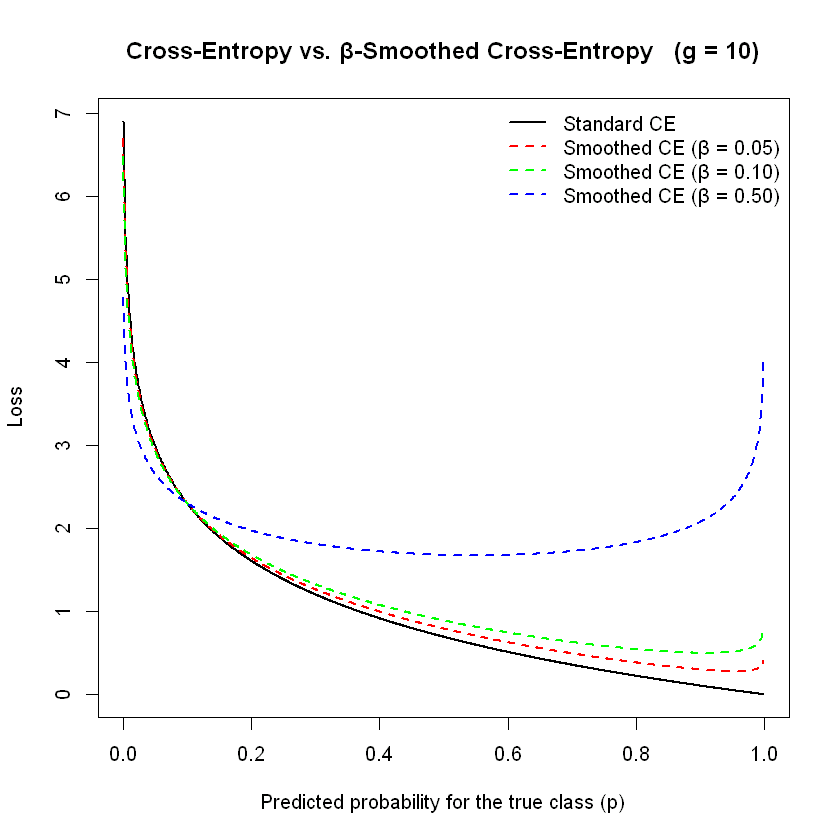

In [12]:
## -----------------------------------------------------------------
## 1. Hyper-parameters you can tweak
g      <- 10                     # number of classes
betas  <- c(0, 0.05, 0.1, 0.5) # include 0 for the vanilla CE
n_pts  <- 1000                   # resolution of the x-axis
## -----------------------------------------------------------------

## 2. Smoothed cross-entropy helper (works for beta = 0 too)
smoothed_ce <- function(p, g, beta) {
  eps       <- .Machine$double.eps          # protects log(0)
  p_other   <- (1 - p) / (g - 1)            # uniform probs for wrong classes
  t_true    <- 1 - beta + beta / g          # smoothed target for true class
  t_other   <- beta / g                     # target for each wrong class

  -( t_true * log(p + eps) +
     (g - 1) * t_other * log(p_other + eps) )
}

## 3. Compute loss curves ---------------------------------------------------
p_vals <- seq(0.001, 0.999, length.out = n_pts)          # x-axis
loss_mat <- sapply(betas, function(b) smoothed_ce(p_vals, g, b))

## 4. Colours & linetypes ---------------------------------------------------
cols <- c("black", rainbow(length(betas) - 1))            # first is CE
ltys <- c(1, rep(2, length(betas) - 1))                   # solid then dashed

## 5. Base-R plot -----------------------------------------------------------
matplot(
  x     = p_vals,
  y     = loss_mat,
  type  = "l",
  lty   = ltys,
  lwd   = 2,
  col   = cols,
  xlab  = "Predicted probability for the true class (p)",
  ylab  = "Loss",
  main  = sprintf("Cross-Entropy vs. β-Smoothed Cross-Entropy   (g = %d)", g)
)

## 6. Legend ----------------------------------------------------------------
legend_labels <- ifelse(
  betas == 0,
  "Standard CE",
  sprintf("Smoothed CE (β = %.2f)", betas)
)
legend(
  "topright",
  legend = legend_labels,
  col    = cols,
  lty    = ltys,
  lwd    = 2,
  bty    = "n"
)
